# Linear Algebra
## Matrix Multiplication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## "Standard" matrix multiplication
Matrix multiplication is NOT commutative, the order matters! $AB \neq BA$

Rules for matrix multiplication:
- The number of columns in the left matrix must be the same as the number of rows in the right matrix.
> Inner dimensions must match ($N, N$)
- The result will be a matrix with the same number of rows in the left matrix and the same number of columns in the right matrix.
> Outer dimensions is the size of resulting matrix ($M, K$)

$$\large
\begin{matrix}
\begin{bmatrix}
 &  &  &  &  & \\
 &  &  &  &  & \\
 &  &  &  &  & \\
 &  &  &  &  & 
\end{bmatrix} & \begin{bmatrix}
 & \\
 & \\
 & \\
 & \\
 & \\
 & 
\end{bmatrix} & = & \begin{bmatrix}
 & \\
 & \\
 & \\
 & 
\end{bmatrix}\\
M\times N & N\times K &  & M\times K
\end{matrix}
$$

### Element perspective matrix multiplication
Each element $c_{i,j}$ in $AB=C$ is the dot product between the $\text i^{th}$ row in $A$ and the $\text j^{th}$ column in $B$.

$$\large
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}\begin{bmatrix}
a & b\\
c & d
\end{bmatrix} =\begin{bmatrix}
1a+2c & 1b+2d\\
3a+4c & 3b+4d
\end{bmatrix}
$$

In [2]:
# Rules for multiplication validity
m = 4
n = 3
k = 6

# Make some matrices
A = np.round(np.random.randn(m,n)) # 4x3
B = np.round(np.random.randn(n,k)) # 3x6
C = np.round(np.random.randn(m,k)) # 4x6

# Test which multiplications are valid
# Think of your answer first, then test
print('A * B:')
print(np.matmul(A,B)), print() # yes

# np.matmul(A,A) # no

print('A.T * C:')
print(np.matmul(A.T,C)), print() # yes

print('B * B.T:')
print(np.matmul(B,B.T)), print() # yes

print('B.T * B:')
print(np.matmul(np.matrix.transpose(B),B)), print() # yes

# np.matmul(B,C) # no
# np.matmul(C,B) # no
# np.matmul(C.T,B) # no

print('C * B.T:')
print(np.matmul(C,B.T)) # yes

A * B:
[[ 0.  2.  0. -2. -2.  0.]
 [ 2. -2.  2.  2.  3. -2.]
 [ 0. -3.  0.  3.  1. -4.]
 [-1.  1. -1. -1. -2.  0.]]

A.T * C:
[[ 0. -2. -4. -1.  1. -2.]
 [ 1.  0. -2.  0.  0.  3.]
 [-1. -1.  0. -2. -2. -1.]]

B * B.T:
[[ 3. -1.  2.]
 [-1.  3.  0.]
 [ 2.  0.  6.]]

B.T * B:
[[ 1.  0.  1.  0.  1.  0.]
 [ 0.  2.  0. -2. -1.  2.]
 [ 1.  0.  1.  0.  1.  0.]
 [ 0. -2.  0.  2.  1. -2.]
 [ 1. -1.  1.  1.  2.  0.]
 [ 0.  2.  0. -2.  0.  4.]]

C * B.T:
[[-1. -2.  0.]
 [-1.  1.  1.]
 [-1.  1.  0.]
 [-2.  3. -4.]]


## Code challenge: matrix multiplication by layering
Implement matrix multiplication via layers.

1. Generate two matrices (A, B)
2. Build the product matrix layer-wise (for loops)
3. Implement the matrix multiplication directly (multiplying two matrices without a loop)
4. Compare results

In [3]:
# 1. Define matrices A & B
m = 4
n = 3
A = np.round(np.random.randn(m, n), 2)
B = np.round(np.random.randn(n, m), 2)
print(f"Matrix A:\n{A}"), print()
print(f"Matrix B:\n{B}"), print()


# 2. Build the product matrix layer-wise (for loops)
matrix = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        # matrix[i][j] = np.dot(A[i], B[:,j])
        matrix[i][j] = np.sum(A[i] * B[:,j])
        
# 3. Implement the matrix multiplication directly (multiplying two matrices without a loop)
# np_mult = A@B
np_mult = np.matmul(A, B)

# Compare results
print(f"Layer-wise matrix: \n{np.round(matrix, 2)}\n")
print(f"NumPy direct multiplication: \n{np.round(np_mult, 2)}")

Matrix A:
[[-0.24 -0.44  1.23]
 [ 1.42  0.93  0.11]
 [-0.45 -1.42 -0.19]
 [-0.52  1.09  1.13]]

Matrix B:
[[ 1.52  1.26 -0.94  1.53]
 [-0.36 -0.91  2.67  1.13]
 [ 0.66  0.52  0.44 -3.1 ]]

Layer-wise matrix: 
[[ 0.61  0.74 -0.41 -4.68]
 [ 1.9   1.    1.2   2.88]
 [-0.3   0.63 -3.45 -1.7 ]
 [-0.44 -1.06  3.9  -3.07]]

NumPy direct multiplication: 
[[ 0.61  0.74 -0.41 -4.68]
 [ 1.9   1.    1.2   2.88]
 [-0.3   0.63 -3.45 -1.7 ]
 [-0.44 -1.06  3.9  -3.07]]


## Matrix-vector multiplication
When multiplying a matrix with a vector the result will always be a vector.

$$\large
 \begin{array}{l}
\begin{matrix}
A & \cdot  & w & = & v\\
m\times n &  & n\times 1 &  & m\times 1
\end{matrix} \ \ \ \ \ \ \ \ \ \ \begin{matrix}
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix} & \begin{bmatrix}
2\\
3
\end{bmatrix} & = & \begin{bmatrix}
a2+b3\\
c2+d3
\end{bmatrix}\\
2\times 2 & 2\times 1 &  & 2\times 1
\end{matrix}\\
\\
\begin{matrix}
w^{T} & \cdot  & A & = & v\\
1\times m &  & m\times n &  & 1\times n
\end{matrix} \ \ \ \ \ \ \ \ \ \ \begin{matrix}
\begin{bmatrix}
2 & 3
\end{bmatrix} & \begin{bmatrix}
a & b\\
c & d
\end{bmatrix} & = & \begin{bmatrix}
a2+c3 & b2+d3
\end{bmatrix}\\
1\times 2 & 2\times 2 &  & 1\times 2
\end{matrix}
\end{array}
$$

Concept:
- $Aw$ &rightarrow; weighted combinations of the ***columns*** of A
- $w^{T}A$ &rightarrow; weighted combinations of the ***rows*** of A

In [4]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
w = np.array([0,1,2])

# Matrix-vector multiplication
print(f"Matrix-vector:\n{A@w}\n")
print(f"vector-Matrix:\n{w.T@A}")

Matrix-vector:
[ 8 17 26]

vector-Matrix:
[18 21 24]


## 2D transformation matrices

In [5]:
# Plot axis
def plot_axis(ax=3):
    plt.plot([-ax, ax],[0, 0],'k--')
    plt.plot([0, 0],[-ax, ax],'k--')
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.legend(loc='upper left')
    plt.axis([-ax,ax,-ax,ax]);

#### Rotation + stretching

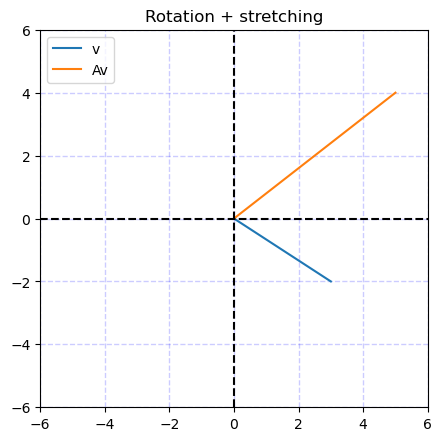

In [6]:
# 2D input vector
v = np.array([3, -2])

# 2x2 transformation matrix
A = np.array([[1,-1], [2,1]])

# Output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)

# Plot them
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')
plt.title('Rotation + stretching')

# Plot axis
plot_axis(ax=6)
plt.show()

#### Pure rotation

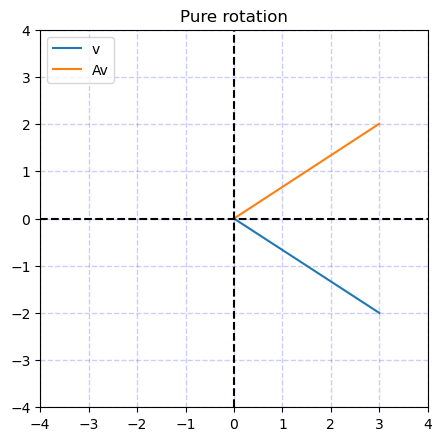

In [7]:
# 2D input vector
v = np.array([3, -2])

# 2x2 rotation matrix
th = 9*np.pi/24
A = np.array([[math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)]])

# Output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)

# Plot them
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')
plt.title('Pure rotation')

# Plot axis
plot_axis(ax=4)
plt.show()

## Code challenge: Pure and impure rotation matrices
Investigate the relationship between the magnitude of the matrix-vector product and the theta (rotation angle) using the following rotation matrix.

In [8]:
# Plot graph
def plot_figure(theta, vecmag):
    plt.figure(figsize=(5,5), dpi=100)
    plt.plot(theta, vecmag, 'o-')
    plt.xlabel("Rotation angle (rad.)")
    plt.ylabel("Av magnitude")
    plt.legend(["Pure rotation", "Impure rotation"])
    plt.title("Pure vs Impure rotation")
    plt.show()

# Compute different rotation matrices
def rotation_matrix(size=100):
    # 2D input vector
    v = np.array([3, -2])
    
    # Init theta and matrices
    thetas = np.linspace(0, 2*np.pi, size)
    vecmags = np.zeros((len(thetas), 2))
    
    # For loop to plot different
    for i in range(len(thetas)):
        th = thetas[i]
        pure = np.array([[math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
        impure = np.array([[2*math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
        
        # Output vector is Av (convert v to column)
        vecmags[i,0] = np.linalg.norm(pure @ v.T)
        vecmags[i,1] = np.linalg.norm(impure @ v.T)

    # Plot them
    plot_figure(theta=thetas, vecmag=vecmags)

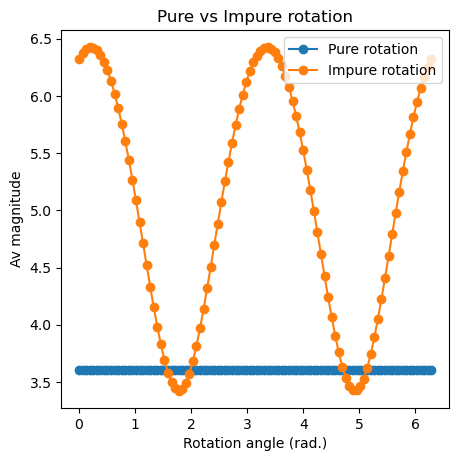

In [9]:
rotation_matrix(size=100)

## Code challenge: Geometric transformations via matrix multiplications
1. Generate X,Y coordinates for a circle
2. Plot circle
3. Create a 2x2 matrix (starting with Identity matrix)
4. Multiply matrix by coordinates
5. Plot new coordinates
6. Try with various matrices and singular matrix (columns form a linear dependent set)

In [10]:
def plot_circle(cir, newCir):
    plt.figure(figsize=(5,5), dpi=100)
    plt.plot(cir[:,0], cir[:,1], 'o')
    plt.plot(newCir[:,0], newCir[:,1], 'o')
    plt.axis('square')
    plt.show();

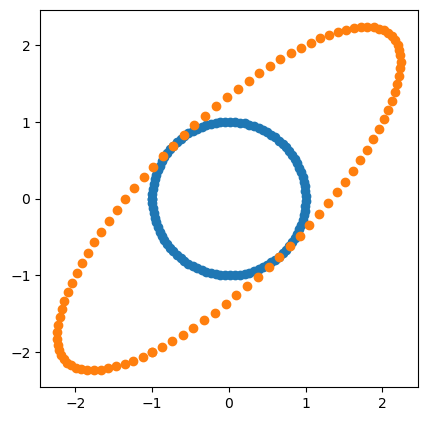

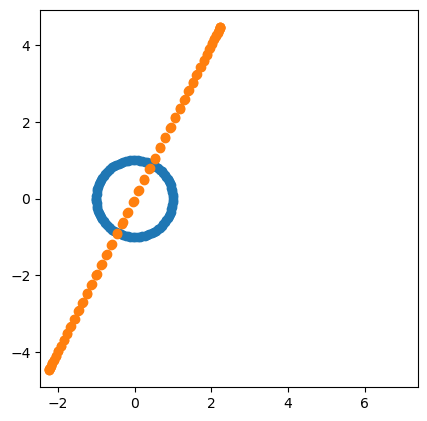

In [11]:
# 1. Generate X,Y coordinates for a circle
# 2. Plot circle
x = np.linspace(-np.pi, np.pi, 100)
xy = np.vstack((np.cos(x), np.sin(x))).T

# plot_circle(coord=xy)

# 3. Create a 2x2 matrix (starting with Identity matrix)
T = np.array([[1, 2], [2, 1]])

# 4. Multiply matrix by coordinates
newXY = xy@T

# 5. Plot new coordinates
plot_circle(cir=xy, newCir=newXY)

# 6. Try with various matrices and singular matrix (columns form a linear dependent set)
singular = np.array([[1, 2], [2, 4]])
sing = xy@singular
plot_circle(xy, sing)

## Additive and multiplicative matrix identities
Multiplicative Identity:

$\large
 \begin{array}{l}
AI=IA=A\\
A+I\neq A
\end{array}
$


Additive Identity:

$\large
 \begin{array}{l}
A0=0A\neq A\\
A+0=A
\end{array}
$

In [12]:
# Matrix size
n = 4

A = np.round(np.random.randn(n))
I = np.eye(n)
Z = np.zeros(n)

# Test both identities
print("A@I == A:  ", np.array_equal(A@I, A))
print("A == A@I:  ", np.array_equal(A, A@I))
print("A == A+I:  ", np.array_equal(A, A+I))
print("A == A+Z:  ", np.array_equal(A, A+Z))
print("A+Z == A@I:", np.array_equal(A+Z, A@I))

A@I == A:   True
A == A@I:   True
A == A+I:   False
A == A+Z:   True
A+Z == A@I: True


## Additive and multiplicative symmetric matrices
Symmetric matrix via the **additive** method:
$$\large
 \begin{array}{l}
S=\left( A+A^{T}\right) /2\\
S=S^{T}\\
\text{iff} \ A\ \text{is} \ n\times n\ \ \ \ \ \ \ \text{(if A is a square matrix)}\\
\\
\text{Example:}\\
\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix} +\begin{bmatrix}
a & d & g\\
b & e & h\\
c & f & i
\end{bmatrix} =\begin{bmatrix}
a+a & b+d & c+g\\
b+d & e+e & h+f\\
c+g & h+f & i+i
\end{bmatrix}
\end{array}
$$

<br>

Multiplicative symmetric matrices ($A^{T}A$ and $AA^T$):
$$\large
 \begin{array}{l}
\underset{n\times m}{A^{T}} \ \underset{m\times n}{A} =\underset{n\times n}{S}\\
\\
\underset{m\times n}{A} \ \underset{n\times m}{A^{T}} =\underset{m\times m}{S}\\
\\
\text{Example:}\\
\begin{bmatrix}
a & b & c\\
d & e & f
\end{bmatrix}\begin{bmatrix}
a & d\\
b & e\\
c & f
\end{bmatrix} =\begin{bmatrix}
a^{2} +b^{2} +c^{2} & ad+be+cf\\
ad+be+cf & d^{2} +e^{2} +f^{2}
\end{bmatrix}
\end{array}
$$

In [13]:
# The additive method
# Specify sizes
m = 5
n = 5

# Create matrices
A = np.random.randn(m,n)
S = (A + A.T)/2

# A symmetric matrix minus its transpose should be all zeros
print(S-S.T)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [14]:
# The multiplicative method
# Specify sizes
m = 5
n = 3

# Create matrices
A   = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# First, show that they are square
print(AtA.shape)
print(AAt.shape), print()

# Next, show that they are symmetric
print(AtA - AtA.T)
print(AAt - AAt.T)

(3, 3)
(5, 5)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Element-wise (Hadamard) multiplication
Multiplying each corresponding element of each matrix.

$$\large
\begin{bmatrix}
0 & 1 & 2\\
-1 & 6 & 3
\end{bmatrix} \odot \begin{bmatrix}
3 & 8 & 5\\
4 & 1 & -5
\end{bmatrix} =\begin{bmatrix}
0 & 8 & 10\\
-4 & 6 & -15
\end{bmatrix}
$$